In [429]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import openpyxl
from openpyxl import workbook
import numpy as np

In [430]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [431]:
data = pd.read_csv('./res/csvDescriptors.csv')
workbook = openpyxl.load_workbook('./res/Titanium spreadsheet MkII - Copy.xlsx', data_only=True)
input_sheet = workbook['ChemOffice1']

metallocenes = data[data['Class'] == 'M']
metallocenes_rows = metallocenes.index + 2
phenolates = data[data['Class'] != 'M']
phenolates_rows = phenolates.index + 2

value_names = []
for i in range(7):
    value_names.append(f"HanschPi{i+1}")
    value_names.append(f"Hammett{i+1}")
    value_names.append(f"VdW{i+1}")

metallocenes_data = metallocenes[value_names[:4]]
metallocenes_potencies = []
for line in metallocenes_rows:
    metallocenes_potencies.append(input_sheet.cell(row=line, column = 5).value)
metallocenes_potencies = np.array(metallocenes_potencies)


phenolates_data = phenolates[value_names].fillna(0)
phenolates_potencies = []
for line in phenolates_rows:
    phenolates_potencies.append(input_sheet.cell(row=line, column = 5).value)
phenolates_potencies = np.array(phenolates_potencies)
print(phenolates_potencies)
print(phenolates_data)


[ 13.           7.         150.         150.           1.9
   4.5         26.5         80.          30.          37.45
   2.86         7.9          2.6          8.5         16.85
  58.15        28.9          5.06         4.72        13.1
  32.58         8.6         25.           5.           5.
  80.          80.         154.          39.           4.91444444
   2.66666667   0.54666667   9.5          3.4          1.1
 150.          10.          11.           6.          18.5
   4.5          3.35         1.7         80.         150.
 150.         120.           5.85       150.          80.
  80.           2.75        45.          44.          29.6
  64.5         63.          66.          22.         100.
  20.          17.          23.          22.          51.
  39.          59.           9.           9.5        150.
  24.           3.5         25.        ]
     HanschPi1  Hammett1       VdW1  HanschPi2  Hammett2     VdW2  HanschPi3  \
36       0.760    -0.134   15.09462      0.000    

C:\Users\AlexPC\anaconda3\envs\my-rdkit-env\lib\site-packages\openpyxl\reader\drawings.py:59: UserWarning: wmf image format is not supported so the image is being dropped
  warn(msg)


Predictions:  [ 31.96277205  42.12832708  94.58583036   3.16232945 -16.66667809
  23.19650621  42.12832708  -3.33963435]
Actual value:  [150.  100.    9.5  26.5   5.   17.   22.    8.5]
R^2 value:  0.36379034647915853


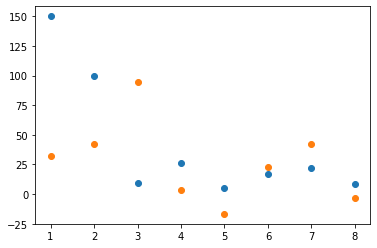

In [437]:
l_reg = linear_model.LinearRegression()

# m_train, m_test, m_p_train, m_p_test = train_test_split(metallocenes_data, metallocenes_potencies, test_size=0.2)
# m_model = l_reg.fit(m_train, m_p_train)
# m_predictions = m_model.predict(m_test)
#
# print("Predictions: ", m_predictions)
# print("Actual value: ", m_p_test)
# plt.scatter(m_p_test, m_predictions)
# plt.show()
# print("R^2 value: ", l_reg.score(metallocenes_data,metallocenes_potencies))



p_train, p_test, p_p_train, p_p_test = train_test_split(phenolates_data, phenolates_potencies, test_size=0.1)
p_model = l_reg.fit(p_train, p_p_train)
p_predictions = p_model.predict(p_test)

x=[1,2,3,4,5,6,7,8]
print("Predictions: ", p_predictions)
print("Actual value: ", p_p_test)
plt.scatter(x, p_p_test)
plt.scatter(x, p_predictions)
plt.show()
print("R^2 value: ", l_reg.score(phenolates_data,phenolates_potencies))